In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df_experience = df[identifier_columns+negativeexperience_in_school_columns]

In [5]:
pivot_df_experienceinschool = df_experience.pivot_table(values=negativeexperience_in_school_columns, index=identifier_columns, aggfunc='mean')

In [6]:
pivot_df_experienceinschool

ASBG11A   ASBG11B   ASBG11C   ASBG11D   ASBG11E  \
Country     ASBH02A                                                     
Austria     No       2.726457  2.986517  2.866817  3.460137  3.269058   
            Yes      3.041048  3.184503  3.121587  3.604669  3.510338   
Egypt       No       2.896694  2.928270  3.137500  3.181435  3.170124   
            Yes      3.069665  3.038547  3.265500  3.299629  3.242747   
France      No       3.271186  3.374468  3.393162  3.512821  3.761702   
            Yes      3.376076  3.416213  3.461259  3.709567  3.752840   
Germany     No       2.947059  2.885542  3.082840  3.421687  3.430303   
            Yes      3.097504  3.055477  3.402086  3.721826  3.667313   
Jordan      No       3.380388  3.283262  3.386117  3.458735  3.489883   
            Yes      3.392230  3.331656  3.394493  3.499672  3.481239   
Netherlands No       3.000000  3.243590  3.012987  3.545455  3.551282   
            Yes      3.235884  3.219989  3.184771  3.598825  3.646432   
Sweden      No       2.929293  3.167235  3.217993  3.512195  3.262411   
            Yes      3.107102  3.390972  3.462949  3.689496  3.453879   

                      ASBG11F   ASBG11G   ASBG11H   ASBG11I   ASBG11J  
Country     ASBH02A                                                    
Austria     No       3.022422  3.357143  3.399103  3.659243  3.654709  
            Yes      3.166541  3.540146  3.624811  3.788297  3.718884  
Egypt       No       3.033613  3.175966  3.250000  3.303419  3.288136  
            Yes      3.178399  3.332795  3.361719  3.394908  3.332957  
France      No       3.282051  3.646809  3.862661  3.885106  3.719149  
            Yes      3.353102  3.691431  3.877760  3.922972  3.760055  
Germany     No       3.220930  3.497041  3.610778  3.700599  3.658683  
            Yes      3.210526  3.673095  3.764151  3.854900  3.739318  
Jordan      No       3.500536  3.595722  3.615139  3.652688  3.588110  
            Yes      3.532304  3.603264  3.632254  3.678377  3.616408  
Netherlands No       2.923077  3.346154  3.743590  3.805195  3.666667  
            Yes      3.026582  3.549072  3.669304  3.722809  3.776842  
Sweden      No       3.199324  3.614334  3.593857  3.775862  3.612457  
            Yes      3.347974  3.698328  3.723258  3.890923  3.738592

In [13]:
# Calculate the total average for each row
pivot_df_experienceinschool['MeanTotal'] = pivot_df_experienceinschool[['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_df_experienceinschool.groupby('Country')['MeanTotal'].mean().sort_values(ascending=False).index.tolist()

### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [14]:
# Get the current index as a DataFrame for sorting
index_df = pivot_df_experienceinschool.index.to_frame()

In [15]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=country_averages, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_experienceinschool.loc[index_df.index]

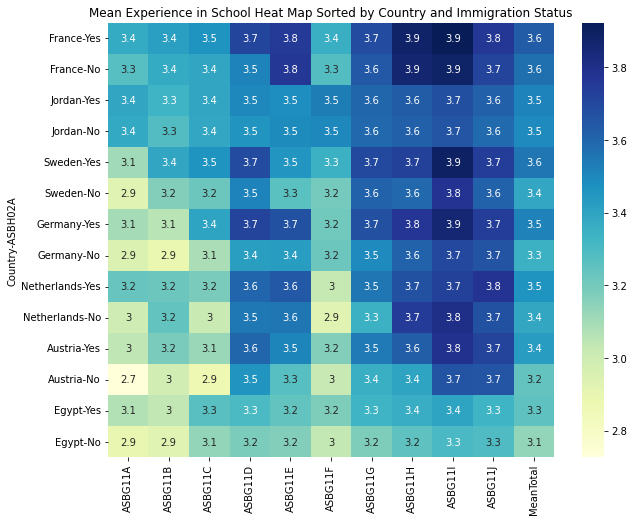

In [16]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\

darker colours are better